# l'exploration / la découverte. Travail interactif.
## EDA
### Informations Fichiers 




In [ ]:
import pandas as pds


Data_File=pds.read_csv("DataSet.csv")
Data_File.head(10)

In [ ]:
def Data_Missed(Data_File):
    Data_File.isnull()

In [2]:

import pandas as pds
import os

# 1. Obtenir le chemin de la racine du projet
# os.getcwd() renvoie le répertoire de travail actuel.
project_root = os.getcwd()

# 2. Construire le chemin vers le fichier CSV
# On joint la racine avec les sous-dossiers et le nom du fichier.
csv_path = os.path.join(project_root,'..', 'data', 'raw', 'ChurnDataFile.csv')

Data_File=pds.read_csv(csv_path)
# print(Data_File)
print("===== Infos Generales ===== ")
Data_File_Info=Data_File.info()

print("===== Dimensions ===== ")
print(Data_File.shape)

# print("===== Sataistiques Decriptives ===== ")
# print(Data_File.describe())

# print("===== Doublons ===== ")
# Data_File_Doublons=Data_File.duplicated().sum()
# print(Data_File_Doublons)

# print("===== Head ===== ")
# Data_File_Head=Data_File.head(3)
# print(Data_File_Head)


===== Infos Generales ===== 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBill

# Analyse Exploratoire et Visualisations   
## 1. La Vue d'Ensemble : Le Heatmap de Corrélation         

===== Obj =====
['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


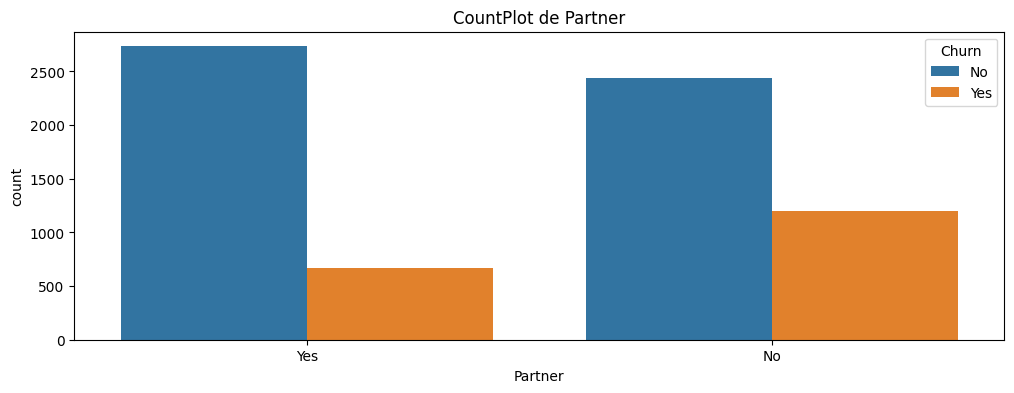

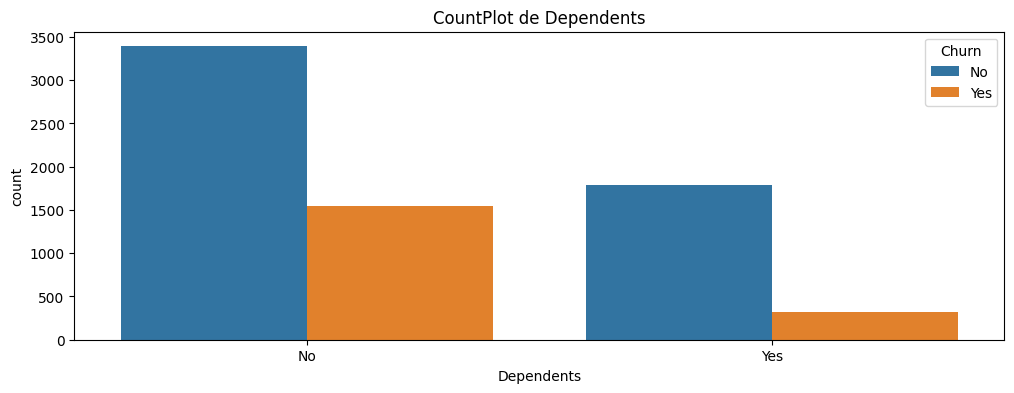

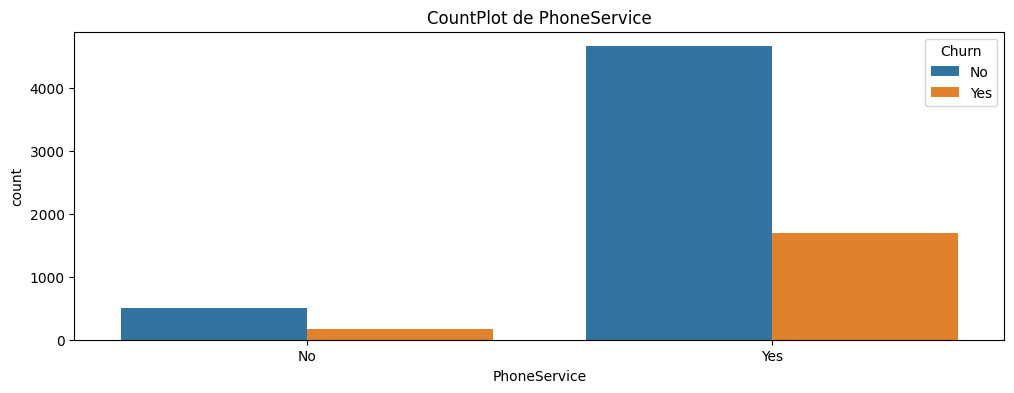

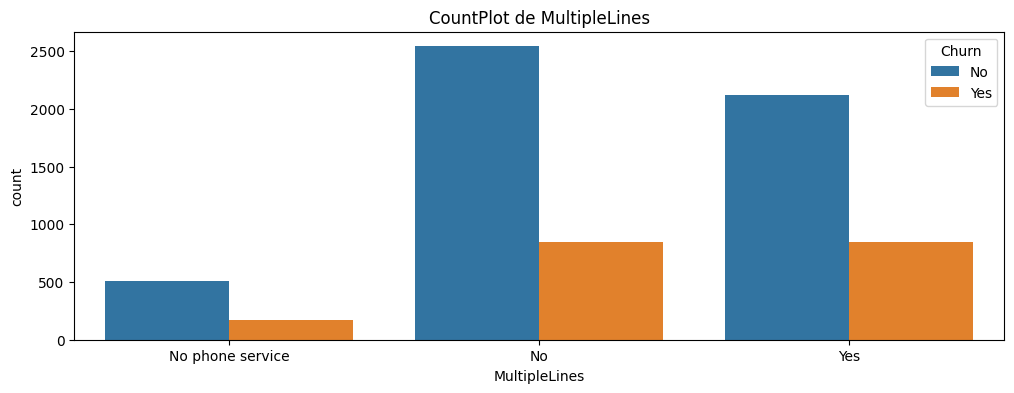

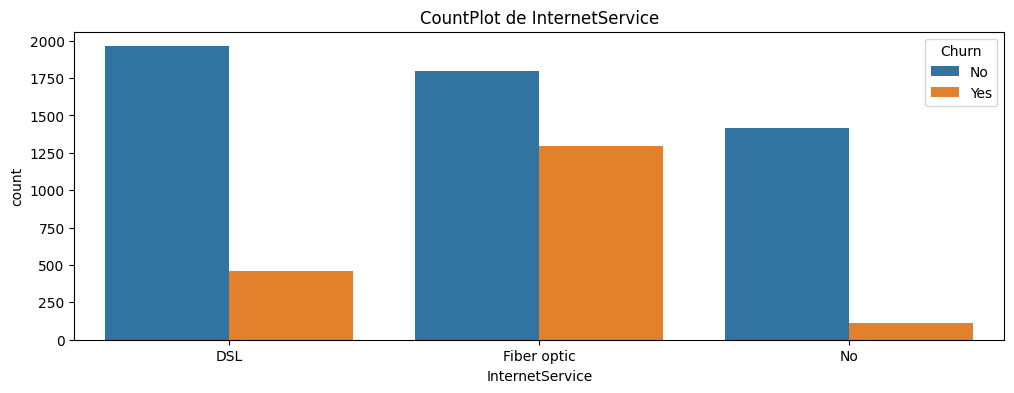

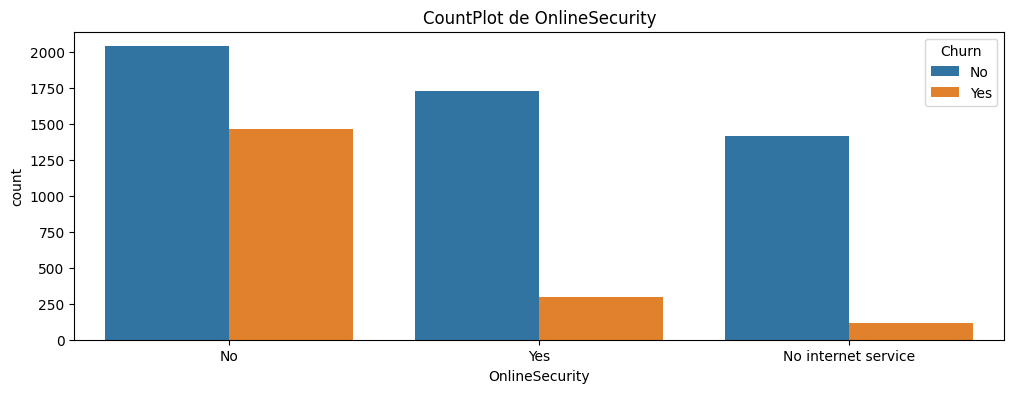

KeyboardInterrupt: 

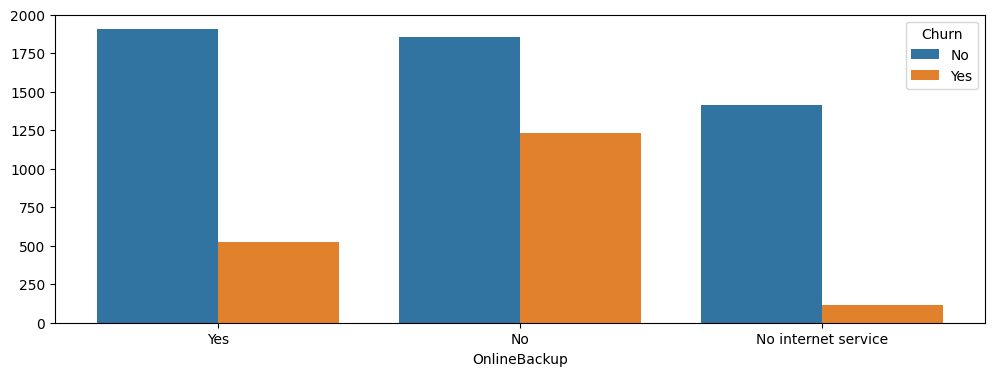

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
# import os
# import pandas as pds
import numpy as np



# Data_File_Num=Data_File.select_dtypes(include=np.number)

# print(Data_File_Num)
Data_File_Obj=['Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

# print("===== Num =====")
# print(Data_File_Num)

print("===== Obj =====")
print(Data_File_Obj)
# print(f"Nbre d'elements dans Obj : {count(Data_File_Obj)}")


for Col_Obj in Data_File_Obj:
    plt.figure(figsize=(12,4))
    sns.countplot(x=Col_Obj, data=Data_File, hue="Churn" )
    plt.title(f'CountPlot de {Col_Obj}')
    plt.show()



# project_root = os.getcwd()
# csv_path = os.path.join(project_root,'..', 'data', 'raw', 'ChurnDataFile.csv')
# Data_File=pds.read_csv(csv_path)

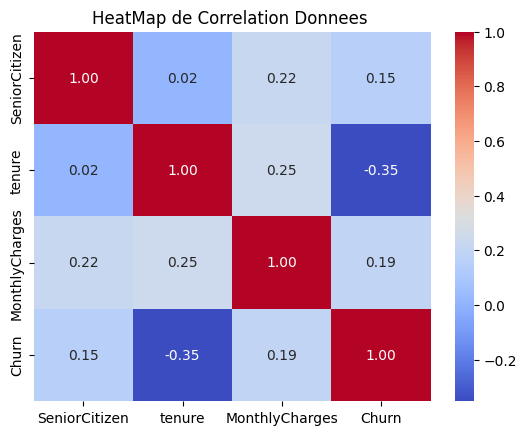

In [ ]:
import os
from tkinter.constants import N
import pandas as pds
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

def path_Notebook() :
    Curr_Path = os.getcwd()
    Data_File_Path = os.path.join(Curr_Path,'..', 'data', 'raw', 'ChurnDataFile.csv')
    if not os.path.exists(Data_File_Path) :
        raise FileNotFoundError(f" Fichier Introuvable : {os.path.abspath(Data_File_Path)}")
    Data_File = pds.read_csv(Data_File_Path)
    return Data_File

path_Notebook()     #path : data file for notebook


Data_File['TotalCharges']=pds.to_numeric(Data_File['TotalCharges'], errors='coerce')
Miss_Val=Data_File["TotalCharges"].isnull()
Data_File['TotalCharges']=Data_File.fillna(Data_File['TotalCharges'].mean(), inplace=True)  #Missed Values

#---- Dictionnaire
Churn_Map={'Yes' : 1, 'No' : 0}
Data_File['Churn']=Data_File["Churn"].map(Churn_Map)

# ---- Label Encoder (2e methode)
l_e=LabelEncoder()
Data_File["Churn"]=l_e.fit_transform(Data_File["Churn"])    # df["item"] = Le.fit_transform(df["item"])


Data_File['Churn']=pds.to_numeric(Data_File['Churn'], errors='coerce')

Data_File_Num=Data_File.select_dtypes(include=np.number)
sns.heatmap(Data_File_Num.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("HeatMap de Correlation Donnees ")
plt.show()

## Encodage des variables

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pds
import os


Data_File_Obj=['Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

# l_ee=LabelEncoder()

project_root = os.getcwd()

csv_path = os.path.join(project_root,'..', 'data', 'raw', 'ChurnDataFile.csv')

Data_File=pds.read_csv(csv_path)

l_ee=LabelEncoder()

# encodeage
for item in Data_File_Obj:
       Data_File[item]=l_ee.fit_transform(Data_File[item])
       # Data_File[item]=pds.to_numeric(Data_File_Obj[item], errors='coerce')
print("===== Apres l'encodage ======")
print(Data_File.head())

# # mappage
# Dict_Map={"Yes" : 1, "No" : 2}
# for item in Data_File_Obj:
#        Data_File[item]=Data_File[item].map(Data_File_Obj)
    
# print("===== Apres l'encodage ======")
# print(l_ee.classes_)

# def encode_categorical(Data_File_Obj):
#     from sklearn.preprocessing import LabelEncoder
#     import pandas as pds

#     dataframe_encoded = Data_File_Obj.copy()
#     categorical_cols = dataframe_encoded.select_dtypes(include=['object']).columns


# for col in categorical_cols:
#         le = LabelEncoder()
#         dataframe_encoded[col] = le.fit_transform(dataframe_encoded[col])
#         print(le.classes_)
#         return dataframe_encoded


# encoded_classes_per_column = {} # Dictionnaire pour stocker les classes de chaque colonne

# for item in Data_File_Obj:
#     if Data_File[item].dtype == 'object': # Assurez-vous d'encoder uniquement les colonnes objets/catégorielles
#         l_ee_col = LabelEncoder() # Crée une nouvelle instance de LabelEncoder pour cette colonne
#         # Gérer les NaN avant d'encoder, si nécessaire
#         Data_File[item] = Data_File[item].fillna('Missing_Category')
#         Data_File[item] = l_ee_col.fit_transform(Data_File[item])
#         encoded_classes_per_column[item] = l_ee_col.classes_ # Stocke les classes de cet encodeur

# print("===== Classes encodées par colonne ======")
# for col, classes in encoded_classes_per_column.items():
#     print(f"Colonne '{col}': {classes}")

# print("\nPremières lignes du DataFrame après encodage :")
# print(Data_File.head())


===== Apres l'encodage ======
   customerID  gender  SeniorCitizen  ...  MonthlyCharges  TotalCharges  Churn
0  7590-VHVEG  Female              0  ...           29.85         29.85      0
1  5575-GNVDE    Male              0  ...           56.95        1889.5      0
2  3668-QPYBK    Male              0  ...           53.85        108.15      1
3  7795-CFOCW    Male              0  ...           42.30       1840.75      0
4  9237-HQITU  Female              0  ...           70.70        151.65      1

[5 rows x 21 columns]
   customerID  gender  SeniorCitizen  ...  MonthlyCharges  TotalCharges  Churn
0  7590-VHVEG  Female              0  ...           29.85         29.85      0
1  5575-GNVDE    Male              0  ...           56.95        1889.5      0
2  3668-QPYBK    Male              0  ...           53.85        108.15      1
3  7795-CFOCW    Male              0  ...           42.30       1840.75      0
4  9237-HQITU  Female              0  ...           70.70        151.65      1

# PipeLine
## Normalisation

In [ ]:
import pandas as pds
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


def Normalisation_Function(Data_File):     
    Data_File_Num=Data_File.select_dtypes(np.number)
    if 'Churn' in Data_File_Num:
        Data_File_Num=Data_File_Num.drop("Churn", axis =1, error='ignore')
    Scaler_Rate=MinMaxScaler()  
    for item in Data_File_Num:      
        Scaler_Rate=MinMaxScaler()            # Instancie un MinMaxScaler (valeurs mises entre 0 et 1) : pandas -- > pds (instance)
        Scaler_Rate.fit(item)                  # Calcule min/max pour chaque colonne à partir des données (apprentissage)
        Data_File_Scaled=Scaler_Rate.transform(Data_File_Num)           # Applique la transformation et retourne un numpy.ndarray
    return Data_File_Scaled